In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import os
import shutil
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt
import random

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Conv2D,MaxPooling2D,Input,Flatten,Dense


In [ ]:
od.download("https://www.kaggle.com/datasets/robinreni/signature-verification-dataset/")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: garuoo
Your Kaggle Key: ··········


100%|██████████| 601M/601M [00:39<00:00, 16.1MB/s]


In [ ]:
path = "/content/signature-verification-dataset/sign_data/sign_data/train"

In [ ]:
dir_list = os.listdir(path)
dir_list.sort()
dir_list

['001',
 '001_forg',
 '002',
 '002_forg',
 '003',
 '003_forg',
 '004',
 '004_forg',
 '006',
 '006_forg',
 '009',
 '009_forg',
 '012',
 '012_forg',
 '013',
 '013_forg',
 '014',
 '014_forg',
 '015',
 '015_forg',
 '016',
 '016_forg',
 '017',
 '017_forg',
 '018',
 '018_forg',
 '019',
 '019_forg',
 '020',
 '020_forg',
 '021',
 '021_forg',
 '022',
 '022_forg',
 '023',
 '023_forg',
 '024',
 '024_forg',
 '025',
 '025_forg',
 '026',
 '026_forg',
 '027',
 '027_forg',
 '028',
 '028_forg',
 '029',
 '029_forg',
 '030',
 '030_forg',
 '031',
 '031_forg',
 '032',
 '032_forg',
 '033',
 '033_forg',
 '034',
 '034_forg',
 '035',
 '035_forg',
 '036',
 '036_forg',
 '037',
 '037_forg',
 '038',
 '038_forg',
 '039',
 '039_forg',
 '040',
 '040_forg',
 '041',
 '041_forg',
 '042',
 '042_forg',
 '043',
 '043_forg',
 '044',
 '044_forg',
 '045',
 '045_forg',
 '046',
 '046_forg',
 '047',
 '047_forg',
 '048',
 '048_forg',
 '049',
 '049_forg',
 '050',
 '050_forg',
 '051',
 '051_forg',
 '052',
 '052_forg',
 '053',
 '053

In [ ]:
dir_list

['001',
 '001_forg',
 '002',
 '002_forg',
 '003',
 '003_forg',
 '004',
 '004_forg',
 '006',
 '006_forg',
 '009',
 '009_forg',
 '012',
 '012_forg',
 '013',
 '013_forg',
 '014',
 '014_forg',
 '015',
 '015_forg',
 '016',
 '016_forg',
 '017',
 '017_forg',
 '018',
 '018_forg',
 '019',
 '019_forg',
 '020',
 '020_forg',
 '021',
 '021_forg',
 '022',
 '022_forg',
 '023',
 '023_forg',
 '024',
 '024_forg',
 '025',
 '025_forg',
 '026',
 '026_forg',
 '027',
 '027_forg',
 '028',
 '028_forg',
 '029',
 '029_forg',
 '030',
 '030_forg',
 '031',
 '031_forg',
 '032',
 '032_forg',
 '033',
 '033_forg',
 '034',
 '034_forg',
 '035',
 '035_forg',
 '036',
 '036_forg',
 '037',
 '037_forg',
 '038',
 '038_forg',
 '039',
 '039_forg',
 '040',
 '040_forg',
 '041',
 '041_forg',
 '042',
 '042_forg',
 '043',
 '043_forg',
 '044',
 '044_forg',
 '045',
 '045_forg',
 '046',
 '046_forg',
 '047',
 '047_forg',
 '048',
 '048_forg',
 '049',
 '049_forg',
 '050',
 '050_forg',
 '051',
 '051_forg',
 '052',
 '052_forg',
 '053',
 '053

In [ ]:
orig_groups, forg_groups = [], []
for directory in dir_list:
    images_path = os.path.join(path,directory)
    if directory.find("forg")==-1:
        image_list = []
        for image_name in sorted(os.listdir(images_path))[:12]:
            img = plt.imread(os.path.join(images_path,image_name))
            img=tf.constant(img)
            img = tf.image.resize(img,size=(100,100))
            image_list.append(img)
        orig_groups.append(image_list)

    else:
        image_list = []
        for image_name in sorted(os.listdir(images_path))[:12]:
            img = plt.imread(os.path.join(images_path,image_name))
            img=tf.constant(img)
            img = tf.image.resize(img,size=(100,100))
            image_list.append(img)
        forg_groups.append(image_list)



In [ ]:
train_data=[]
X = []
X_1 = []
X_2 = []
for index , original_signature_list in enumerate(orig_groups):
    for index , forge_signature_list in enumerate(forg_groups):
        for original_signature in original_signature_list:
            for forge_signature in forge_signature_list:
                train_data.append(((original_signature,forge_signature,tf.zeros(1))))
                X.append(original_signature)
                X.append(forge_signature)

                X_1.append(original_signature)
                X_2.append(forge_signature)


for index , original_signature_list in enumerate(orig_groups):
    for index , original_signature_list_2 in enumerate(orig_groups):
        for original_signature in original_signature_list:
            for original_signature_2 in original_signature_list_2:
                train_data.append((original_signature,original_signature_2,tf.ones(1)))
                X.append(original_signature)
                X.append(original_signature_2)

                X_1.append(original_signature)
                X_2.append(original_signature_2)


In [ ]:
len(train_data)

1135872

In [ ]:
random.shuffle(train_data)
X = []
y = []
size = 0
for element in train_data:
    X.append([ element[0],element[1] ])
    y.append([element[2]])
    size+=1

In [ ]:
y = np.array(y).astype('float32')

In [ ]:
def make_embedding():
    inp = Input(shape=(100,100,3),name="input_image")
    c1 = Conv2D(filters=64,kernel_size=(10,10),activation='relu')(inp)
    m1 = MaxPooling2D(64,(2,2),padding="same")(c1)
    c2= Conv2D(filters=128,kernel_size=(7,7),activation="relu")(m1)
    m2 = MaxPooling2D(64,(2,2),padding="same")(c2)
    c3= Conv2D(filters=128,kernel_size=(4,4),activation="relu")(m2)
    m3 = MaxPooling2D(64,(2,2),padding="same")(c3)
    c4= Conv2D(filters=256,kernel_size=(4,4),activation="relu")(m3)
    f1= Flatten()(c4)
    output=Dense(4096,activation='sigmoid')(f1)
    model = Model(inputs=inp,outputs=output,name="embedding")
    return model

In [ ]:
class L1Dist(Layer):
    def __init__(self,**kwargs):
        super().__init__()
    
    def call(self,input_embedding,validation_embedding):
        return tf.math.abs(input_embedding-validation_embedding)


In [ ]:
def make_siamese_model():
    # input images
    input_image = Input(shape=(100,100,3),name='input_image')
    validation_image = Input(shape=(100,100,3),name='valdiation_image')
    
    # make embedding layer
    embedding = make_embedding()
    
    #combine siamese distances
    siamese_layer = L1Dist()
    distances = siamese_layer(embedding(input_image),embedding(validation_image))
    
    # Classifier Layer
    classifier = Dense(1,activation='sigmoid')(distances)
    
    return Model(inputs=[input_image,validation_image],outputs=[classifier])
    

In [ ]:
GENIUENE_PATH = os.path.join("data","GENIUENE")
FORGED_PATH = os.path.join("data","FORGED")
ANC_PATH = os.path.join("data","anchor")

In [ ]:
!mkdir data
!mkdir data/GENIUENE
!mkdir data/FORGED

In [ ]:
import shutil
        

In [ ]:
path = "/content/signature-verification-dataset/sign_data/sign_data/train"
for directory in os.listdir(path):
    if directory.find("forg")==-1:
       shutil.move(os.path.join(path,directory),GENIUENE_PATH)
    else:
        shutil.move(os.path.join(path,directory),FORGED_PATH)


In [ ]:
forged_dir = os.listdir("/content/data/FORGED")
geniuene_dir = os.listdir("/content/data/GENIUENE")
len(forged_dir)

64

In [ ]:
negative = tf.data.Dataset.list_files("/content/data/FORGED"+"/*"+"/*").take(100)
positive =  tf.data.Dataset.list_files("/content/data/GENIUENE/"+geniuene_dir[0]+"/*").take(100)
positive_2 = tf.data.Dataset.list_files("/content/data/GENIUENE/"+geniuene_dir[0]+"/*").take(100)

positives = tf.data.Dataset.zip(((positive, positive_2), tf.data.Dataset.from_tensor_slices(tf.ones(len(positive)))))
negatives = tf.data.Dataset.zip(((positive, negative), tf.data.Dataset.from_tensor_slices(tf.zeros(len(negative)))))

data = positives.concatenate(negatives)

In [ ]:
for i in range(0,64):
    negative = tf.data.Dataset.list_files("/content/data/FORGED"+"/*"+"/*").take(100)
    positive =  tf.data.Dataset.list_files("/content/data/GENIUENE/"+geniuene_dir[i]+"/*").take(100)
    positive_2 = tf.data.Dataset.list_files("/content/data/GENIUENE/"+geniuene_dir[i]+"/*").take(100)

    positives = tf.data.Dataset.zip(((positive, positive_2), tf.data.Dataset.from_tensor_slices(tf.ones(len(positive)))))
    negatives = tf.data.Dataset.zip(((positive, negative), tf.data.Dataset.from_tensor_slices(tf.zeros(len(negative)))))

    data = data.concatenate(negatives)
    data = data.concatenate(positives)


In [ ]:
data = data.shuffle(3000)


In [ ]:
list(data)

[((<tf.Tensor: shape=(), dtype=string, numpy=b'/content/data/GENIUENE/032/01_032.png'>,
   <tf.Tensor: shape=(), dtype=string, numpy=b'/content/data/GENIUENE/032/07_032.png'>),
  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>),
 ((<tf.Tensor: shape=(), dtype=string, numpy=b'/content/data/GENIUENE/059/06_059.png'>,
   <tf.Tensor: shape=(), dtype=string, numpy=b'/content/data/GENIUENE/059/03_059.png'>),
  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>),
 ((<tf.Tensor: shape=(), dtype=string, numpy=b'/content/data/GENIUENE/041/01_041.png'>,
   <tf.Tensor: shape=(), dtype=string, numpy=b'/content/data/FORGED/053_forg/04_0115053.PNG'>),
  <tf.Tensor: shape=(), dtype=float32, numpy=0.0>),
 ((<tf.Tensor: shape=(), dtype=string, numpy=b'/content/data/GENIUENE/042/07_042.png'>,
   <tf.Tensor: shape=(), dtype=string, numpy=b'/content/data/FORGED/034_forg/03_0103034.PNG'>),
  <tf.Tensor: shape=(), dtype=float32, numpy=0.0>),
 ((<tf.Tensor: shape=(), dtype=string, numpy=b'/content/data/GENIUENE/

In [ ]:
len(list(data))

5346

In [ ]:
negatives.as_numpy_iterator().next()


((b'/content/data/GENIUENE/041/06_041.png',
  b'/content/data/FORGED/036_forg/02_0109036.PNG'),
 0.0)

In [ ]:
def preprocess(filepath):
    #read image from file path
    byte_img = tf.io.read_file(filepath)
    #load in the image
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img,size=(100,100))
    img = tf.cast(img,tf.float32)/255.0
    return img

In [ ]:
data.as_numpy_iterator().next()

((b'/content/data/GENIUENE/029/12_029.png',
  b'/content/data/GENIUENE/029/04_029.png'),
 1.0)

In [ ]:
def preproces_helper(images,label):
    return ((preprocess(images[0]),preprocess(images[1])),label)

In [ ]:
# build a dataloader pipeline
data = data.map(preproces_helper)
data.cache()

<CacheDataset element_spec=((TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None)), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
# training dataset
train_data = data.take(round(len(data)*0.9))
# turn training data into batches
train_data =train_data.batch(32)

In [ ]:
test_data = data.skip(round(len(data)*0.9))
#turn test_data into batches
test_data = test_data.batch(32)

In [ ]:
len(train_data.as_numpy_iterator().next())

2

In [ ]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
len(list(train_data))

151

In [ ]:
siamese_model = make_siamese_model()
siamese_model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
siamese_history = siamese_model.fit(train_data, epochs=30 , validation_data=test_data)



Epoch 1/30
151/151 [==============================] - 160s 1s/step - loss: 0.5379 - accuracy: 0.6092 - val_loss: 0.4784 - val_accuracy: 0.7178
Epoch 2/30
151/151 [==============================] - 195s 1s/step - loss: 0.4677 - accuracy: 0.7460 - val_loss: 0.4575 - val_accuracy: 0.7832
Epoch 3/30
151/151 [==============================] - 193s 1s/step - loss: 0.4323 - accuracy: 0.8264 - val_loss: 0.3967 - val_accuracy: 0.8935
Epoch 4/30
151/151 [==============================] - 195s 1s/step - loss: 0.3872 - accuracy: 0.8967 - val_loss: 0.3588 - val_accuracy: 0.9234
Epoch 5/30
151/151 [==============================] - 194s 1s/step - loss: 0.3507 - accuracy: 0.9216 - val_loss: 0.3293 - val_accuracy: 0.9252
Epoch 6/30
151/151 [==============================] - 193s 1s/step - loss: 0.3402 - accuracy: 0.9221 - val_loss: 0.3554 - val_accuracy: 0.8766
Epoch 7/30
151/151 [==============================] - 195s 1s/step - loss: 0.3320 - accuracy: 0.9297 - val_loss: 0.3035 - val_accuracy: 0.9364

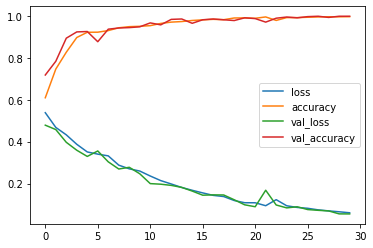

In [ ]:
pd.DataFrame(siamese_history.history).plot()

In [223]:
pd.DataFrame(siamese_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.537942,0.609229,0.478397,0.717757
1,0.467742,0.745999,0.457507,0.783178
2,0.432321,0.826439,0.396730,0.893458
3,0.387185,0.896695,0.358837,0.923364
4,0.350683,0.921638,0.329270,0.925234
5,0.340246,0.922054,0.355419,0.876635
6,0.331964,0.929744,0.303480,0.936449
7,0.287685,0.943047,0.269299,0.942056
8,0.270158,0.948451,0.277463,0.943925
9,0.259611,0.950114,0.246620,0.947664


In [224]:
siamese_model.evaluate(test_data)

17/17 [==============================] - 77s 405ms/step - loss: 0.0583 - accuracy: 0.9981


[0.058251045644283295, 0.9981308579444885]

In [225]:
plt.imshow

((array([[[[0.9607843 , 0.99215686, 0.99215686],
           [0.9607843 , 0.99215686, 0.99215686],
           [0.9625814 , 0.99215686, 0.99215686],
           ...,
           [0.9607843 , 0.99215686, 0.99215686],
           [0.9607843 , 0.99215686, 0.99215686],
           [0.9607843 , 0.99215686, 0.99215686]],
  
          [[0.9607843 , 0.99215686, 0.99215686],
           [0.9607843 , 0.99215686, 0.99215686],
           [0.9607843 , 0.99215686, 0.99215686],
           ...,
           [0.9607843 , 0.99215686, 0.9906348 ],
           [0.96073675, 0.99215686, 0.9921395 ],
           [0.9607843 , 0.99215686, 0.99215686]],
  
          [[0.9607843 , 0.99215686, 0.99215686],
           [0.9566779 , 0.9921475 , 0.98190486],
           [0.9607843 , 0.99215686, 0.99215686],
           ...,
           [0.9607843 , 0.99215686, 0.99215686],
           [0.9607843 , 0.99215686, 0.99215686],
           [0.9570682 , 0.99215686, 0.99091816]],
  
          ...,
  
          [[0.9607843 , 0.99215686, 0.99

In [ ]:
# Save weights
siamese_model.save('siamesemodel')

In [ ]:
siamese_history